# Exploring und Plotting

**Inhalt:** Selbständige Übung in Gruppen

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Daten herunterladen und einlesbar aufbereiten
- Selbständig Daten explorieren und Storyideen testen
- Colormaps kennenlernen

# Das Beispiel

Temperaturdaten von Meteoschweiz.

Quelle und Dokumentation: https://www.meteoschweiz.admin.ch/home/klima/schweizer-klima-im-detail/schweizer-temperaturmittel/daten-schweizer-temperaturmittel.html

Datenfile: https://www.meteoschweiz.admin.ch/product/input/climate-data/swissmean/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt

Speichern Sie die Datei an einem geeigneten Ort, zB im Unterornder `dataprojects/Meteoschweiz/`

## Vorbereitung

Wir laden die übliche Library:

In [1]:
import pandas as pd

## Datenfile laden

Wie ist die Datei strukturiert? Was müssen wir beim Laden beachten?

In [2]:
path = "dataprojects/Meteoschweiz/10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt"

In [3]:
df = pd.read_csv(path, skiprows=15, delimiter="\t")

In [4]:
df

,time,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
0,1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47,NaN,3.19,10.93,3.86,NaN,8.49,3.16
1,1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07,-4.73,3.74,12.04,6.12,-2.85,10.86,4.41
2,1866,-1.31,-0.42,-1.00,4.11,4.95,12.02,12.25,9.98,9.70,5.34,-0.20,-0.49,-1.60,2.69,11.42,4.95,0.11,8.84,4.58
3,1867,-3.87,0.56,-0.13,3.49,7.74,10.57,11.29,12.93,10.43,2.92,-1.43,-5.80,-1.27,3.70,11.60,3.97,0.20,9.41,4.06
4,1868,-5.46,-1.53,-2.30,2.33,12.04,11.97,12.89,12.50,11.12,4.76,-1.98,1.27,-4.26,4.02,12.45,4.63,-2.27,10.47,4.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2017,-5.15,0.46,4.11,4.42,9.80,15.18,15.05,15.45,8.65,7.78,0.88,-2.43,-1.60,6.11,15.23,5.77,1.09,11.43,6.18
154,2018,0.48,-5.21,-0.21,7.81,10.43,13.81,16.24,15.89,12.56,8.04,2.79,-0.11,-2.39,6.01,15.31,7.80,0.21,12.79,6.88
155,2019,-4.37,0.73,2.27,4.47,6.08,15.25,16.21,15.10,11.37,8.45,1.51,0.78,-1.25,4.27,15.52,7.11,1.56,11.42,6.49
156,2020,-0.28,1.62,1.53,7.62,9.53,11.82,15.40,15.20,11.87,5.36,3.69,-1.18,0.71,6.23,14.14,6.97,2.27,11.91,6.85


## Daten checken

**Länge und Spalten**

In [5]:
df.shape

(158, 20)

**Integrität**

In [6]:
df.dtypes

time        int64
jan       float64
feb       float64
mar       float64
apr       float64
may       float64
jun       float64
jul       float64
aug       float64
sep       float64
oct       float64
nov       float64
dec       float64
djf       float64
mam       float64
jja       float64
son       float64
winter    float64
summer    float64
year      float64
dtype: object

**Was bedeuten die einzelnen Spalten?**

- "time": das Jahr
- "jan" bis "dec": die Monats-Mittelwerte
- "djf" bis "son": die Quartals-Mittelwerte
- "winter" und "summer": die Halbjahres-Mittelwerte
- "year": der Jahres-Mittelwert

## Explorieren

Ihr Ziel ist, aus den Temperaturdaten eine einfache Story zu generieren.

Überlegen Sie sich dazu:
- Welche Fragen richten Sie an das Temperaturdaten-Set?
- Welche Auswertungen sind nötig, um die Fragen zu beanworten?
- Wie stellen Sie die Resultate mittels Grafiken dar?

Arbeiten Sie in Gruppen, um ein Ergebnis zu erarbeiten:
- Drei bis vier Sätze, welche die Story zusammenfassen
- eine oder mehrere Grafiken, die das Ergebnis illustrieren

### Beispiellösung 1:

**Temperaturkurvenvergleich**
- Jahresverlauf der Temperaturen
- im Zehnjahresmittel
- heute (2009-2018) und vor hundert Jahren (1919-1918)

In [7]:
# Spalte "time" als Index setzen
df.set_index('time', inplace=True)

In [8]:
# Das vereinfacht die spätere Bearbeitung
df.head(2)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,djf,mam,jja,son,winter,summer,year
time,,,,,,,,,,,,,,,,,,,
1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47,NaN,3.19,10.93,3.86,NaN,8.49,3.16
1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07,-4.73,3.74,12.04,6.12,-2.85,10.86,4.41


In [9]:
# Liste von Monaten erstellen
monate = ['jan','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [10]:
# Dataframe auf Monate reduzieren
df_m = df[monate].copy()

In [11]:
# Was uns nicht interessiert, ist jetzt weg
df_m.head(2)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
time,,,,,,,,,,,,
1864,-7.10,-4.52,0.04,2.11,7.43,9.48,12.37,10.95,8.59,3.50,-0.51,-4.47
1865,-3.47,-6.25,-5.91,7.03,10.09,10.98,13.99,11.16,11.90,5.19,1.26,-3.07


In [12]:
# Nur 1909 bis 1918 anzeigen
df_m.loc[1909:1918]

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
time,,,,,,,,,,,,
1909,-5.39,-6.45,-3.05,4.50,6.75,8.67,10.38,11.81,8.20,6.06,-1.58,-1.46
1910,-3.25,-2.93,-0.59,2.07,5.62,10.73,10.39,11.43,7.06,5.87,-1.43,-0.86
1911,-5.50,-3.07,-0.64,2.01,7.35,10.14,15.26,15.27,11.23,5.08,1.82,-0.86
1912,-2.27,0.10,1.47,1.81,8.05,10.50,11.98,9.07,4.38,3.70,-2.52,-1.11
1913,-2.12,-3.16,1.73,2.49,6.95,10.13,9.55,11.20,8.53,6.57,2.69,-2.83
1914,-6.53,-0.48,-0.01,5.17,5.72,9.16,10.90,12.26,8.54,4.34,-0.66,-1.13
1915,-4.72,-3.81,-1.52,1.75,9.56,12.38,11.83,10.92,7.70,2.48,-2.16,0.77
1916,-0.96,-2.63,-0.05,3.09,8.05,8.33,11.57,11.69,7.25,4.75,0.37,-1.93
1917,-6.13,-5.20,-2.82,-0.45,9.97,12.63,12.50,11.43,11.50,2.52,-0.14,-6.28


In [13]:
# Mittelwerte 1909-1918 berechnen
s_frueher = df_m.loc[1909:1918].mean()

In [14]:
# Mittelwerte 2009-2018 berechnen
s_heute = df_m.loc[2009:2018].mean()

In [15]:
# Beide Mittelwertsreihen in Dataframe zusammenfügen
df_v = pd.DataFrame({'Vor 100 Jahren': s_frueher, 'Heute': s_heute})

In [16]:
# So sieht das neue Dataframe aus
df_v

,Vor 100 Jahren,Heute
jan,-3.967,-2.458
feb,-2.992,-2.768
mar,-0.605,1.400
apr,2.552,5.623
may,7.668,8.920
jun,10.105,12.911
jul,11.679,14.974
aug,11.702,14.757
sep,8.420,10.931
oct,4.474,6.873


In [17]:
# Temperaturzunahme je nach Monat berechnen
s_diff = s_heute - s_frueher

In [18]:
s_diff

jan    1.509
feb    0.224
mar    2.005
apr    3.071
may    1.252
jun    2.806
jul    3.295
aug    3.055
sep    2.511
oct    2.399
nov    2.871
dec    0.504
dtype: float64

### Story

<AxesSubplot:title={'center':'Temperaturen im Monatsmittel'}>

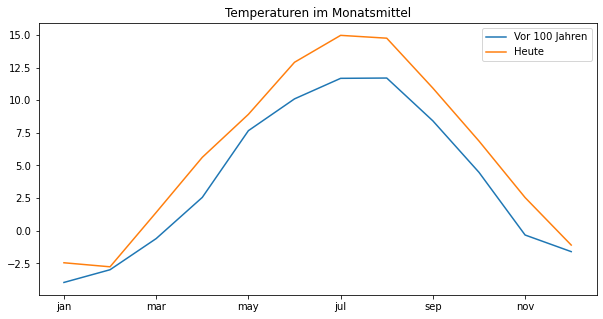

In [19]:
df_v.plot(figsize=(10,5), title="Temperaturen im Monatsmittel")

**Grafik 1:** Die Temperaturen sind in den letzten 100 Jahren gestiegen. Sowohl in den Sommermonaten, als auch im Winter liegen die monatlichen Mittelwerte in den Jahren 2009 bis 2018 über jenen der Jahre 1909 bis 1918.

<AxesSubplot:title={'center':'Temperaturzunahme je nach Monat'}>

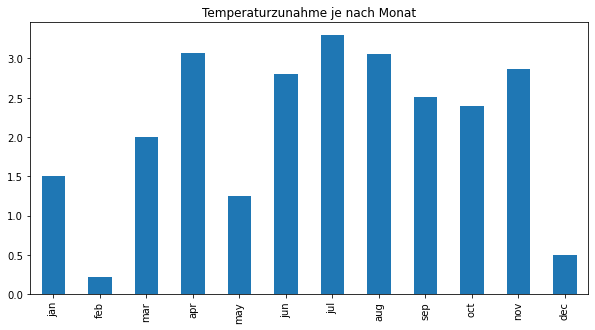

In [20]:
s_diff.plot(kind='bar', figsize=(10,5), title="Temperaturzunahme je nach Monat")

**Grafik 2**: Am grössten ist die Temperaturzunahme im Sommer. Im Juli lagen die mittleren Temperaturen über 3 Grad höher. Weniger stark gestiegen sind die Temperaturen im Winter. Im Februar und im Dezember beträgt die Zunahme unter 0,5 Grad.

### Beispiellösung 2:

**Climate Stripes**
- Jahresmittelwerte werden nach Farben codiert
- Ganze Datenreihe (1864-2019)
- Visualisierung illustriert den Anstieg

Story dazu: https://www.republik.ch/2019/04/08/die-schoenste-klimagrafik-der-welt

**Libraries**

In [21]:
# Wir brauchen noch einige Libraries....

In [22]:
import matplotlib

In [23]:
import matplotlib.pyplot as plt

In [24]:
import matplotlib.colors as mcolors

In [25]:
from PIL import Image

**Dokumentation**

Wir werden mit Colormaps arbeiten:

https://matplotlib.org/examples/color/colormaps_reference.html

**Datenvorbereitung**

In [26]:
# Uns interessieren nur die Jahreswerte
df_y = df[['year']].copy()

In [27]:
# Minimal- und Maximalwerte für die Normierung der Farbskala ermittlen
minimum = df_y['year'].min()
maximum = df_y['year'].max()

**Farbschema vorbereiten**

In [28]:
# Farbskala normieren
normierung = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum, clip=True)

In [29]:
# Colormap auswählen
farbschema = plt.cm.RdBu_r

In [30]:
# Colormap auswählen und Norm übergeben
mapper = plt.cm.ScalarMappable(norm=normierung, cmap=farbschema)

**Farbliste generieren**

In [31]:
# Wir wenden hier eine Lambda-Funktion an...
farbliste = df_y['year'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))

In [32]:
# So sieht die Liste aus
farbliste.head(2)

time
1864    #1a5899
1865    #cae1ee
Name: year, dtype: object

**Plotten**

In [33]:
# Für unseren Plot brauchen wir eine "Dummy"-Spalte
df_y['values'] = 1

In [34]:
df_y.head(2)

,year,values
time,,
1864,3.16,1
1865,4.41,1


<AxesSubplot:xlabel='time'>

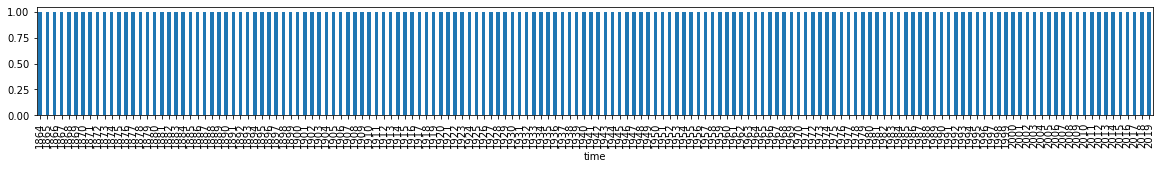

In [35]:
# Für jede dieser Dummy-Werte wird nun ein 1 Einheit hoher Balken gezeichnet
df_y.loc[1864:2019]['values'].T.plot(kind='bar', figsize=(20,2))

<AxesSubplot:xlabel='time'>

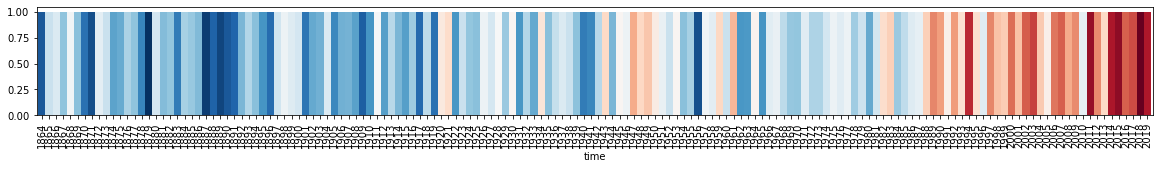

In [36]:
# Jetzt geben wir für jeden Balken einen Farbwert mit und machen die Zwischenräume weg
df_y.loc[1864:2019]['values'].T.plot(kind='bar', figsize=(20,2), color=farbliste, width=1)

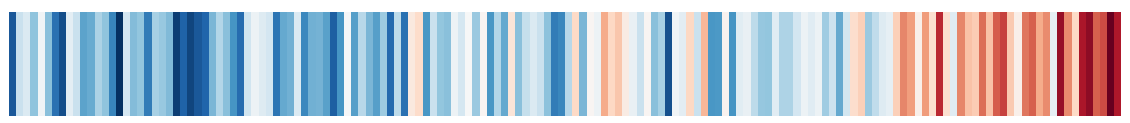

In [37]:
# Noch etwas Ungeziefer entfernen und fertig ist der Klimastreifen
ax = df_y.loc[1864:2019]['values'].T.plot(kind='bar', figsize=(20,2), color=farbliste, legend=False, width=1)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

**Zum individuell weiter ausprobieren:**
- Farbstreifen für verschiedene Monate oder Jahreszeiten
- Farbstreifen nach verschiedenen Normierungen
- Farbstreifen mit veschiedenen Farbskalen!

Siehe auch: https://www.republik.ch/2019/04/08/die-schoenste-klimagrafik-der-welt